# Import libraries

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# path dari training dan testing image
training_data_folder_path = './dataset/training-data'
test_data_folder_path = './dataset/test-data'

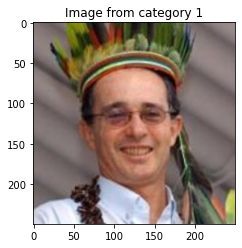

In [4]:
# membaca sample training image
random_image = cv2.imread('./dataset/training-data/1/Alvaro_Uribe_0020.jpg')

# menampilkan sample training image
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('Image from category 1')
plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))
plt.show()

# Deteksi Wajah

In [5]:
# set path untuk haarcascade pretrained model untuk deteksi wajah
haarcascade_frontalface = './opencv_xml_files/ haarcascade_frontalface.xml'

In [6]:
# mendefinisikan fungsi untuk deteksi wajah dari trainging image 
def detect_face(input_img):
    
    # dilakukan convert RGB image ke gray scale image
    image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
 
    
    face_cascade = cv2.CascadeClassifier('./opencv_xml_files/haarcascade_frontalface.xml')
    
    # deteksi wajah dari input image
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.2, minNeighbors=5);
    
    # mengecek apabila wajah dapat dideteksi
    if (len(faces) == 0):
        return -1, -1
    
    # menentukan koordinat dari bounding box dari deteksi wajah
    (x, y, w, h) = faces[0]
    
    return image[y:y+w, x:x+h], faces[0]

# Menyiapkan training dataset

In [7]:
# mendefinisikan fungsi untuk training preparation
def prepare_training_data(training_data_folder_path):
    
    # mendefinisikan label
    detected_faces = []
    face_labels = []
    
    # akses list folder atau direktori dari training images didalam  training image folder
    traning_image_dirs = os.listdir(training_data_folder_path)
    
    # dilakukan pengulangan list dari training folder
    for dir_name in traning_image_dirs:
        label = int(dir_name)
        training_image_path = training_data_folder_path + "/" + dir_name
        training_images_names = os.listdir(training_image_path)
        
        for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            image = cv2.imread(image_path)
            face, rect = detect_face(image)
            if face is not -1:
                
                # dilakukan resized pada tiap image karena eigenface hanya menerima ukuran yang sama dr semua image
                resized_face = cv2.resize(face, (121,121), interpolation = cv2.INTER_AREA)
                
                # disimpan pada label
                detected_faces.append(resized_face)
                face_labels.append(label)

    return detected_faces, face_labels

<>:21: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:21: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-7-6733269d3634>:21: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face is not -1:


In [8]:
# deteksi image dan label
detected_faces, face_labels = prepare_training_data("./dataset/training-data")

In [9]:
print("Total faces: ", len(detected_faces))
print("Total labels: ", len(face_labels))

Total faces:  105
Total labels:  105


# Inisialisasi pengenalan wajah

In [10]:
eigenfaces_recognizer = cv2.face.EigenFaceRecognizer_create()

# train the face recognizer model

In [11]:
eigenfaces_recognizer.train(detected_faces, np.array(face_labels))

In [12]:
def draw_rectangle(test_image, rect):
    (x, y, w, h) = rect
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(test_image, label_text, x, y):
    cv2.putText(test_image, label_text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

# Memprediksi output on test data

In [13]:
def predict(test_image):
    detected_face, rect = detect_face(test_image)
    resized_test_image = cv2.resize(detected_face, (121,121), interpolation = cv2.INTER_AREA)
    label= eigenfaces_recognizer.predict(resized_test_image)
    label_text = tags[label[0]]
    draw_rectangle(test_image, rect)
    draw_text(test_image, label_text, rect[0], rect[1]-5)
    return test_image, label_text

In [14]:
tags = ['0', '1', '2', '3', '4']

In [15]:
test_image = cv2.imread("./dataset/test-data/1/Alvaro_Uribe_0021.jpg")

In [16]:
predicted_image, label = predict(test_image)

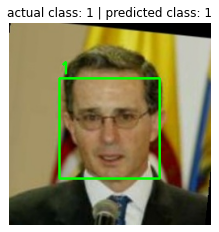

In [17]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
test_image = cv2.imread("./dataset/test-data/1/Alvaro_Uribe_0022.jpg")

In [19]:
predicted_image, label = predict(test_image)

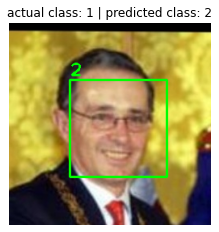

In [20]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
def predict(test_image):
    detected_face, rect = detect_face(test_image)
    resized_test_image = cv2.resize(detected_face, (121,121), interpolation = cv2.INTER_AREA)
    label= eigenfaces_recognizer.predict(resized_test_image)
    label_text = tags[label[0]]
    draw_rectangle(test_image, rect)
    draw_text(test_image, label_text, rect[0], rect[1]-5)
    return test_image, label_text

In [22]:
tags = ['0', '1', '2', '3', '4']

In [23]:
test_image = cv2.imread("./dataset/test-data/0/Junichiro_Koizumi_0021.jpg")

In [24]:
predicted_image, label = predict(test_image)

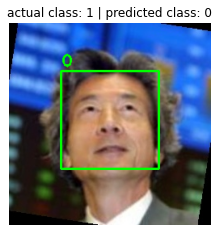

In [25]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
test_image = cv2.imread("./dataset/test-data/0/Junichiro_Koizumi_0022.jpg")

In [27]:
predicted_image, label = predict(test_image)

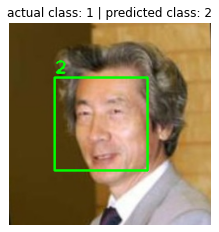

In [28]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
test_image = cv2.imread("./dataset/test-data/2/George_Robertson_0021.jpg")

In [30]:
predicted_image, label = predict(test_image)

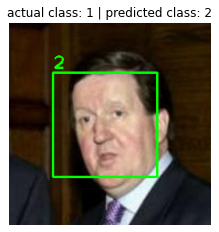

In [31]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
test_image = cv2.imread("./dataset/test-data/2/George_Robertson_0022.jpg")

In [33]:
predicted_image, label = predict(test_image)

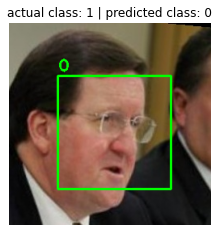

In [34]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [35]:
test_image = cv2.imread("./dataset/test-data/3/George_W_Bush_0021.jpg")

In [36]:
predicted_image, label = predict(test_image)

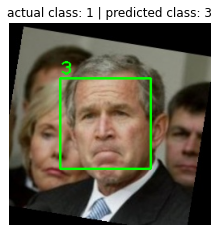

In [37]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [38]:
test_image = cv2.imread("./dataset/test-data/3/George_W_Bush_0022.jpg")

In [39]:
predicted_image, label = predict(test_image)

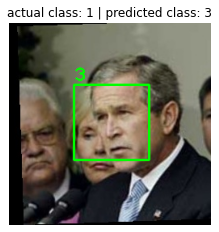

In [40]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [41]:
test_image = cv2.imread("./dataset/test-data/4/Atal_Bihari_Vajpayee_0021.jpg")

In [42]:
predicted_image, label = predict(test_image)

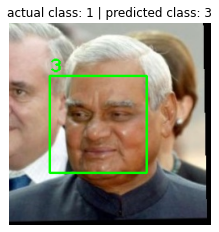

In [43]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
test_image = cv2.imread("./dataset/test-data/4/Atal_Bihari_Vajpayee_0022.jpg")

In [45]:
predicted_image, label = predict(test_image)

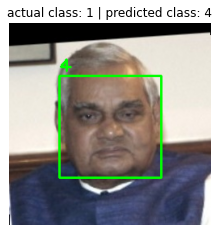

In [46]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [47]:
test_image = cv2.imread("./dataset/test-data/5/Amelia_Vega_0006.jpg")

In [48]:
predicted_image, label = predict(test_image)

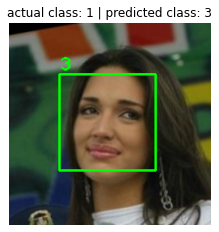

In [49]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [50]:
test_image = cv2.imread("./dataset/test-data/6/Ana_Guevara_0006.jpg")

In [51]:
predicted_image, label = predict(test_image)

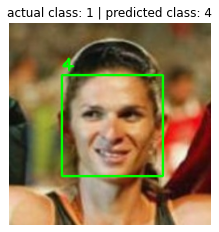

In [52]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [53]:
test_image = cv2.imread("./dataset/test-data/6/Ana_Guevara_0007.jpg")

In [54]:
predicted_image, label = predict(test_image)

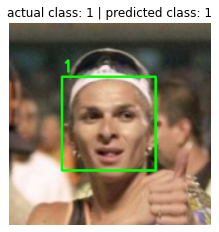

In [55]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

# Testing foto baru

In [56]:
test_image = cv2.imread("./dataset/test-data/0/cantik.jpg")

In [57]:
predicted_image, label = predict(test_image)

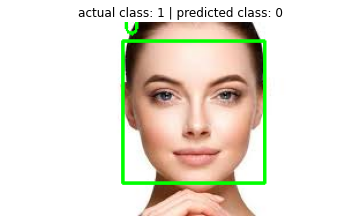

In [58]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()